# Across methods

## ICA

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FastICA
from scipy.spatial.distance import squareform, pdist

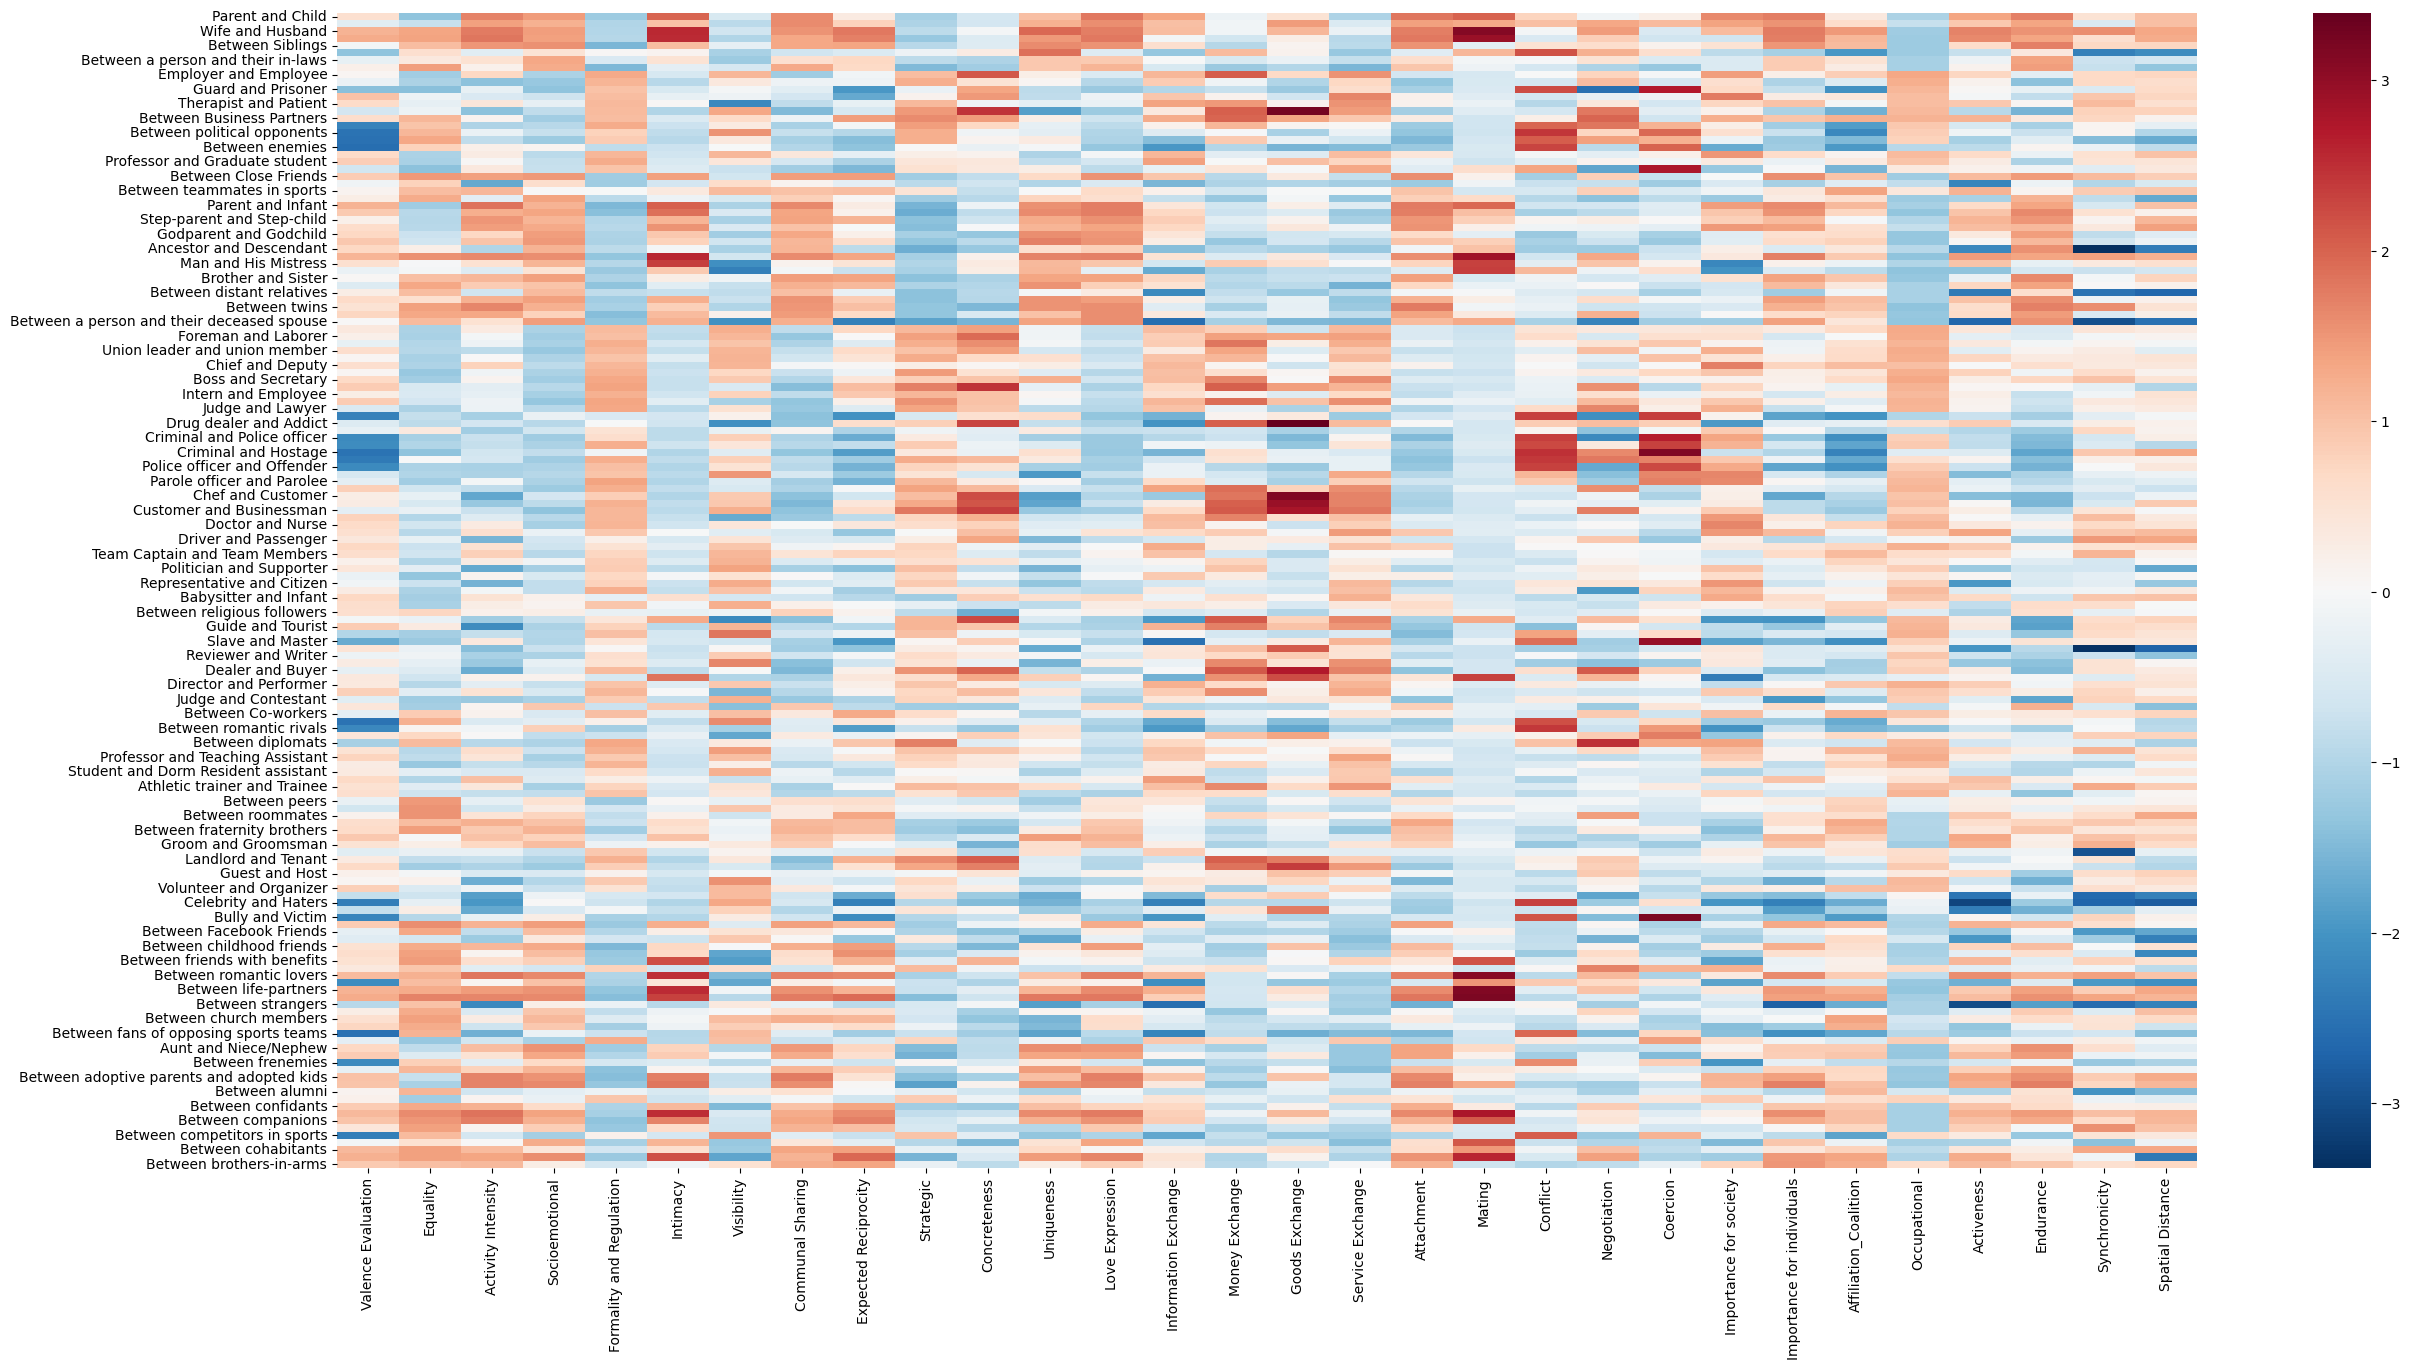

In [2]:
dim_rel_scaled = pd.read_csv('output_data/cleaning_results/USA_dim_rel_scaled_30d.csv',
                             index_col=0)
plt.figure(figsize=(30,15))
heatmap = sns.heatmap(dim_rel_scaled, center=0,cmap="RdBu_r")

In [3]:
## I increase max_iter because default (200) cannot converge
## ICA result has a certain randomness, so each run will be slightly different

rng = 2022
ica_5 = FastICA(n_components = 5, random_state = rng,max_iter = 10000)
dim_rel_ica_5 = ica_5.fit_transform(dim_rel_scaled)
ica_df_5 = pd.DataFrame(dim_rel_ica_5, columns=['IC1', 'IC2', 'IC3', 'IC4','IC5'], 
                        index=dim_rel_scaled.index)
ica_df_5.to_csv('output_data/ica_results/ica_5d_scores.csv')

ica_dim_df_5 = pd.concat([ica_df_5, dim_rel_scaled], axis=1)# correlate raw data with ica
## correlation
## I chose spearman correlation, based on ranking
ic_dim_cor_5_temp = ica_dim_df_5.corr(method = 'spearman')
ic_dim_cor_5 = pd.DataFrame(ic_dim_cor_5_temp.iloc[5:,0:5])

## output
ic_dim_cor_5.to_csv('output_data/ica_results/ica_5d_loadings.csv')

## EFA

In [2]:
library(psych)
library(tidyverse)
library(corrplot)
library(RColorBrewer)

In [3]:
dim_rel_scaled = read.csv('output_data/cleaning_results/USA_dim_rel_scaled_30d.csv',
                          row.names=1,encoding = 'UTF-8')
dim_rel.ml.var = fa(dim_rel_scaled,nfactors=5,fm="ml",rotate="varimax")
dim_rel.ml.var$loadings
scores_var = as.data.frame(dim_rel.ml.var$scores)

loadings_var = as.data.frame(dim_rel.ml.var$loadings[,])
colnames(loadings_var) = c('FA1','FA2','FA3','FA4','FA5')
colnames(scores_var) = c('FA1','FA2','FA3','FA4','FA5')
write.csv(loadings_var,file='output_data/efa_results/efa_5d_loadings.csv')
write.csv(scores_var,file='output_data/efa_results/efa_5d_scores.csv')


Loadings:
                           ML1    ML2    ML4    ML3    ML5   
Valence.Evaluation          0.190  0.391  0.138  0.832       
Equality                    0.315 -0.122 -0.287  0.133  0.662
Activity.Intensity          0.555  0.726 -0.247  0.145       
Socioemotional              0.817        -0.421  0.269  0.187
Formality.and.Regulation   -0.815  0.125  0.419 -0.141 -0.227
Intimacy                    0.810  0.335         0.236  0.115
Visibility                 -0.720                            
Communal.Sharing            0.582  0.274 -0.587  0.361  0.210
Expected.Reciprocity        0.276  0.488         0.417  0.603
Strategic                  -0.771         0.541 -0.197       
Concreteness               -0.313  0.123  0.800 -0.120       
Uniqueness                  0.646  0.457 -0.154              
Love.Expression             0.694  0.320 -0.364  0.452       
Information.Exchange       -0.238  0.715  0.140  0.395       
Money.Exchange             -0.325         0.840            

## MDS

In [6]:
library(MASS)

In [23]:
DV_159 = read.csv('output_data/cleaning_results/USA_dim_rel_scaled_30d.csv',row.names=1)
dim_dist = as.matrix(dist(DV_159,method = "euclidean"))

fit_mds_score_none = cmdscale(dim_dist,eig=TRUE,k=5)
# independent variable for regression 
IV = fit_mds_score_none$points
IV = as.data.frame(IV)
write.csv(IV, file = 'output_data/mds_results/mds_5d_scores.csv')

# use raw data to regress mds
coe_matrix = matrix(nrow = 30, ncol = 7)
coe_df = as.data.frame(coe_matrix)
row.names(coe_df) = colnames(DV_159)
colnames(coe_df) = c('V1','V2','V3','V4','V5','R2','F')

#Regression in each dimension
for (i in seq(30)){
    fit = lm(DV_159[[i]]~IV_reorder$V1+IV_reorder$V2+IV_reorder$V3+IV_reorder$V4+IV_reorder$V5)
    for (j in seq(5)){coe_df[i,j] = fit$coefficients[j+1]}
    coe_df[i,6] = summary(fit)$r.square
    coe_df[i,7] = summary(fit)$fstatistic[1]}
write.csv(coe_df, file = 'output_data/mds_results/mds_5d_loadings.csv')

# Plot loading results

## ICA

png 
  2

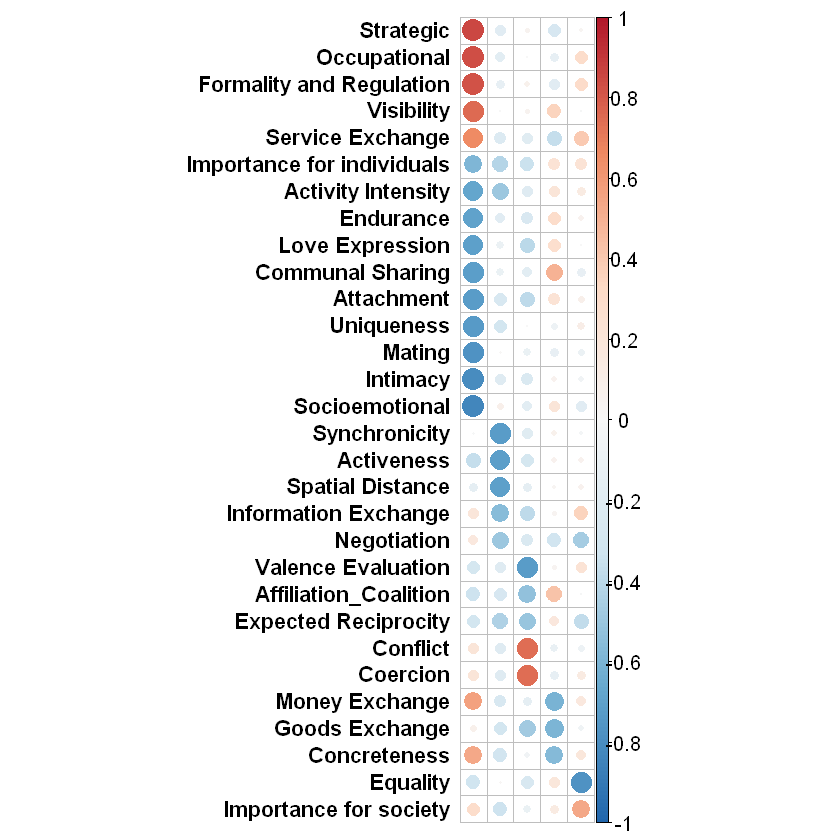

In [27]:
loadings_reorder = read.csv('output_data/ica_results/ica_5d_loadings.csv',row.names=1)
dimensions = rownames(loadings_reorder)
dimensions = gsub('Importance for individuals involved','Importance for individuals', dimensions)
rownames(loadings_reorder) = dimensions

colnames(loadings_reorder) = c('Equality','Formality','Activeness','Exchange','Valence')
loadings_reorder = loadings_reorder[,c('Formality','Activeness','Valence','Exchange','Equality')]
ICA_results = loadings_reorder

#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:30)){
    temp_max = abs(loadings_reorder[row,1])
    n = 1
    for (col in c(2:5)){
        temp = abs(loadings_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
        }
        
    }
    order_list[row] = n
}
loadings_reorder = loadings_reorder %>% mutate(order = order_list) %>% arrange(order)
RC1 = loadings_reorder %>% filter(order==1) %>% arrange(desc(Formality))
RC2 = loadings_reorder %>% filter(order==2) %>% arrange(Activeness)
RC3 = loadings_reorder %>% filter(order==3) %>% arrange(Valence)
RC4 = loadings_reorder %>% filter(order==4) %>% arrange(Exchange)
RC5 = loadings_reorder %>% filter(order==5) %>% arrange(Equality)

loadings_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
loadings_reorder = loadings_reorder[1:5]
colnames(loadings_reorder) = rep('',each=5)

my.breaks = c(seq(-1,1,by=0.01))
corrplot(as.matrix(loadings_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(-1,1),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))


png("output_graph/ica_loadings_bipolar.png", bg="transparent",
    family = 'sans',units='in',width=6,height=10,res=300)
corrplot(as.matrix(loadings_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(-1,1),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))
dev.off()

##  EFA

png 
  2

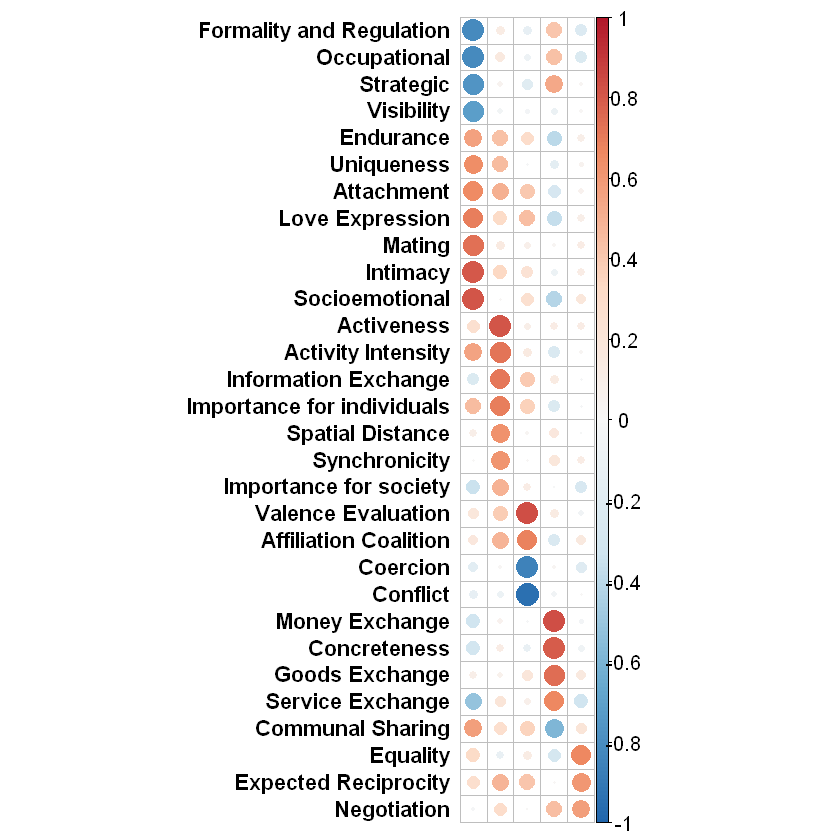

In [28]:
loadings_reorder = read.csv('output_data/efa_results/efa_5d_loadings.csv',row.names=1)
dimensions = c('Valence Evaluation','Equality','Activity Intensity','Socioemotional','Formality and Regulation',
               'Intimacy','Visibility','Communal Sharing','Expected Reciprocity','Strategic',
               'Concreteness','Uniqueness','Love Expression','Information Exchange','Money Exchange',
               'Goods Exchange','Service Exchange','Attachment','Mating','Conflict','Negotiation',
               'Coercion','Importance for society','Importance for individuals','Affiliation Coalition',
               'Occupational','Activeness','Endurance','Synchronicity','Spatial Distance')
rownames(loadings_reorder) = dimensions

colnames(loadings_reorder) = c('Formality','Activeness','Exchange','Valence','Equality')
# change the order of factors to math with results of PCA
loadings_reorder = loadings_reorder[,c('Formality','Activeness','Valence','Exchange','Equality')]
EFA_results = loadings_reorder
#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:30)){
    temp_max = abs(loadings_reorder[row,1])
    n = 1
    for (col in c(2:5)){
        temp = abs(loadings_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
        }
        
    }
    order_list[row] = n
}

loadings_reorder = loadings_reorder %>% mutate(order = order_list) %>% arrange(order)
FA1 = loadings_reorder %>% filter(order==1) %>% arrange(Formality)
FA2 = loadings_reorder %>% filter(order==2) %>% arrange(desc(Activeness))
FA3 = loadings_reorder %>% filter(order==3) %>% arrange(desc(Valence))
FA4 = loadings_reorder %>% filter(order==4) %>% arrange(desc(Exchange))
FA5 = loadings_reorder %>% filter(order==5) %>% arrange(desc(Equality))

loadings_reorder = rbind(FA1,FA2,FA3,FA4,FA5)
loadings_reorder = loadings_reorder[1:5]
colnames(loadings_reorder) = rep('',each=5)

my.breaks = c(seq(-1,1,by=0.01))
corrplot(as.matrix(loadings_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(-1,1),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))


png("output_graph/efa_loadings_bipolar.png", bg="transparent",
    family = 'sans',units='in',width=6,height=10,res=300)
corrplot(as.matrix(loadings_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(-1,1),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))
dev.off()

## MDS

png 
  2

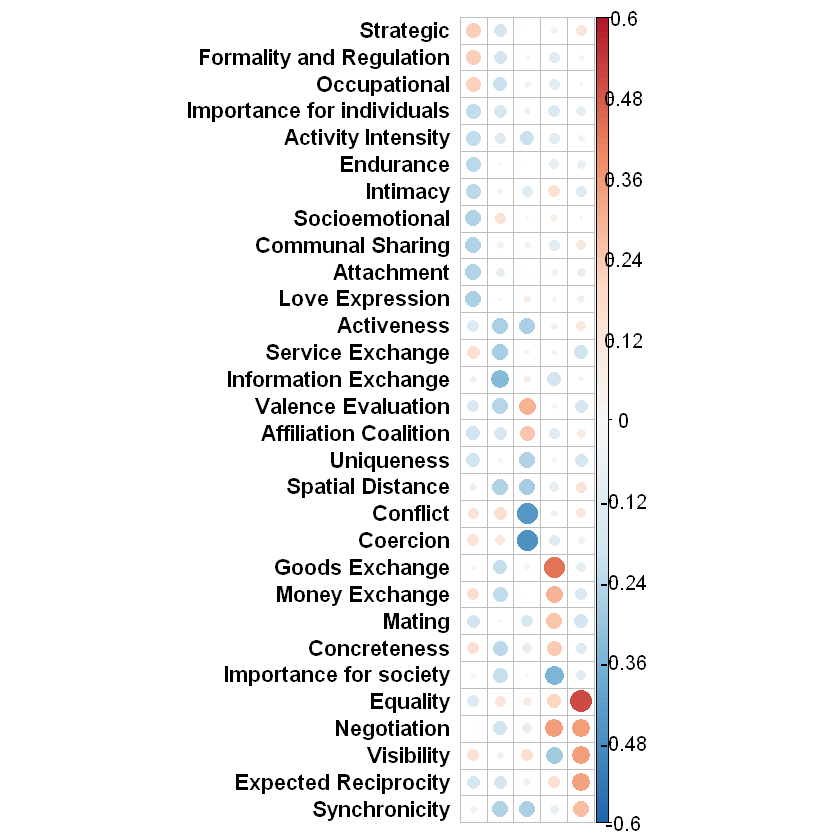

In [29]:
loadings_reorder = read.csv('output_data/mds_results/mds_5d_loadings.csv',row.names=1)
dimensions = c('Valence Evaluation','Equality','Activity Intensity','Socioemotional','Formality and Regulation',
               'Intimacy','Visibility','Communal Sharing','Expected Reciprocity','Strategic',
               'Concreteness','Uniqueness','Love Expression','Information Exchange','Money Exchange',
               'Goods Exchange','Service Exchange','Attachment','Mating','Conflict','Negotiation',
               'Coercion','Importance for society','Importance for individuals','Affiliation Coalition',
               'Occupational','Activeness','Endurance','Synchronicity','Spatial Distance')
rownames(loadings_reorder) = dimensions

colnames(loadings_reorder) = c('Formality','Activeness','Valence','Exchange','Equality')
# change the order of factors to math with results of PCA
loadings_reorder = loadings_reorder[,c('Formality','Activeness','Valence','Exchange','Equality')]
MDS_results = loadings_reorder

#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:30)){
    temp_max = abs(loadings_reorder[row,1])
    n = 1
    for (col in c(2:5)){
        temp = abs(loadings_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
        }
        
    }
    order_list[row] = n
}

loadings_reorder = loadings_reorder %>% mutate(order = order_list) %>% arrange(order)
FA1 = loadings_reorder %>% filter(order==1) %>% arrange(desc(Formality))
FA2 = loadings_reorder %>% filter(order==2) %>% arrange(desc(Activeness))
FA3 = loadings_reorder %>% filter(order==3) %>% arrange(desc(Valence))
FA4 = loadings_reorder %>% filter(order==4) %>% arrange(desc(Exchange))
FA5 = loadings_reorder %>% filter(order==5) %>% arrange(desc(Equality))

loadings_reorder = rbind(FA1,FA2,FA3,FA4,FA5)
loadings_reorder = loadings_reorder[1:5]
colnames(loadings_reorder) = rep('',each=5)

my.breaks = c(seq(-0.6,0.6,by=0.01))
corrplot(as.matrix(loadings_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(-0.6,0.6),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))


png("output_graph/mds_loadings_bipolar.png", bg="transparent",
    family = 'sans',units='in',width=6,height=10,res=300)
corrplot(as.matrix(loadings_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(-0.6,0.6),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))
dev.off()

# Correlation

## loadings

In [30]:
pca_loadings = read.csv('output_data/pca_results/USA_loadings_var.csv',row.names=1)
rownames(pca_loadings) = dimensions
colnames(pca_loadings) = c('Formality_pca','Activeness_pca','Valence_pca',
                           'Exchange_pca','Equality_pca')
colnames(ICA_results) = c('Formality_ica','Activeness_ica','Valence_ica',
                           'Exchange_ica','Equality_ica')
rownames(ICA_results) = dimensions
colnames(EFA_results) = c('Formality_efa','Activeness_efa','Valence_efa',
                           'Exchange_efa','Equality_efa')
colnames(MDS_results) = c('Formality_mds','Activeness_mds','Valence_mds',
                           'Exchange_mds','Equality_mds')

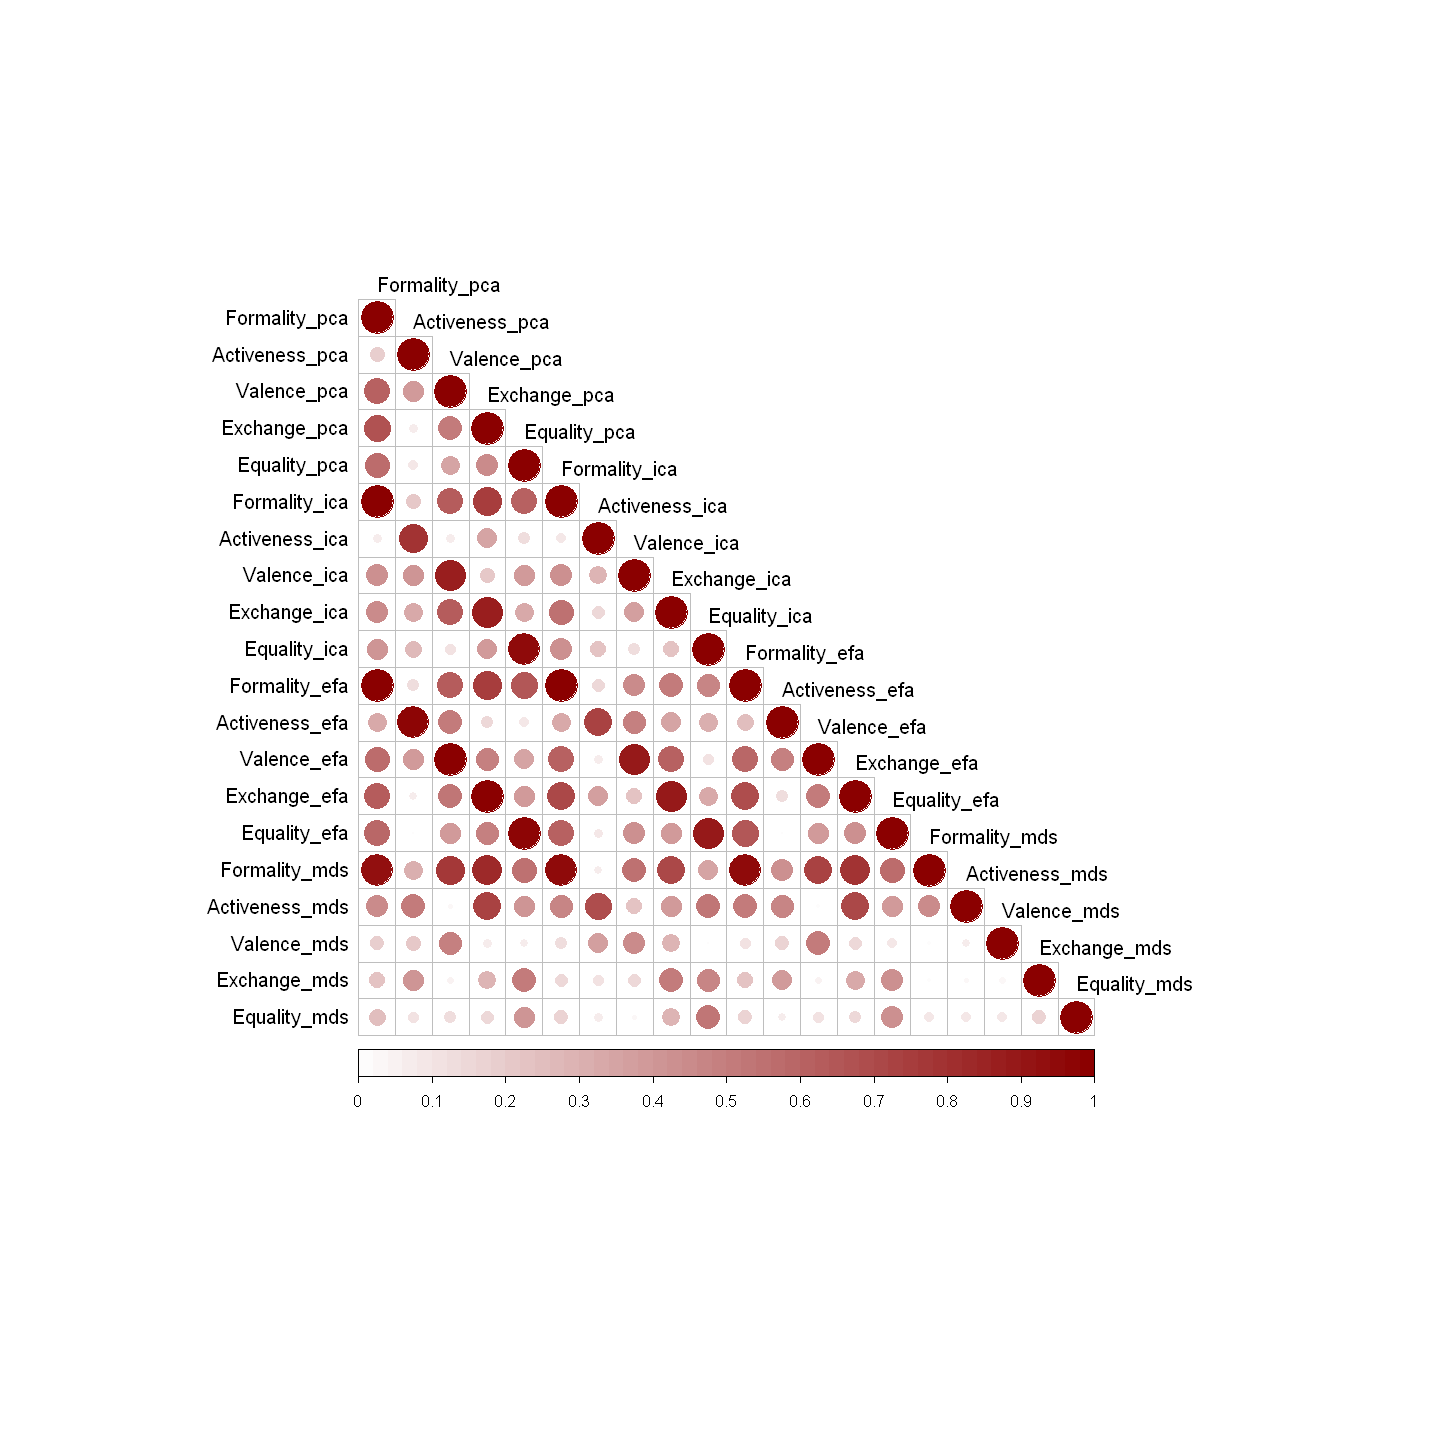

In [40]:
options(repr.plot.width = 12,repr.plot.height = 12)
loading_combine = cbind(pca_loadings,ICA_results,EFA_results,MDS_results)
corr_loadings = cor(loading_combine,method='spearman')
corrplot(abs(as.matrix(corr_loadings)),
         type = 'lower',diag = TRUE,bg='transparent',
         col.lim = c(0,1),col= colorRampPalette(c("midnightblue","white","darkred"))(100),
         tl.col="black",tl.srt = 0.001, mar = c(2,2,2,2),
         family = 'sans')

## scores

In [32]:
pca_scores = read.csv('output_data/pca_results/USA_scores_var.csv',row.names=1)
colnames(pca_scores) = c('Formality_pca','Activeness_pca','Valence_pca',
                           'Exchange_pca','Equality_pca')

ica_scores = read.csv('output_data/ica_results/ica_5d_scores.csv',row.names=1)
colnames(ica_scores) = c('Equality_ica','Formality_ica','Activeness_ica',
                           'Exchange_ica','Valence_ica')
ica_scores = ica_scores[,c('Formality_ica','Activeness_ica','Valence_ica',
                           'Exchange_ica','Equality_ica')]

efa_scores = read.csv('output_data/efa_results/efa_5d_scores.csv',row.names=1)
colnames(efa_scores) = c('Formality_efa','Activeness_efa','Exchange_efa',
                           'Valence_efa','Equality_efa')
efa_scores = efa_scores[,c('Formality_efa','Activeness_efa','Valence_efa',
                           'Exchange_efa','Equality_efa')]

mds_scores = read.csv('output_data/mds_results/mds_5d_scores.csv',row.names=1)
colnames(mds_scores) = c('Formality_mds','Activeness_mds','Valence_mds',
                           'Exchange_mds','Equality_mds')

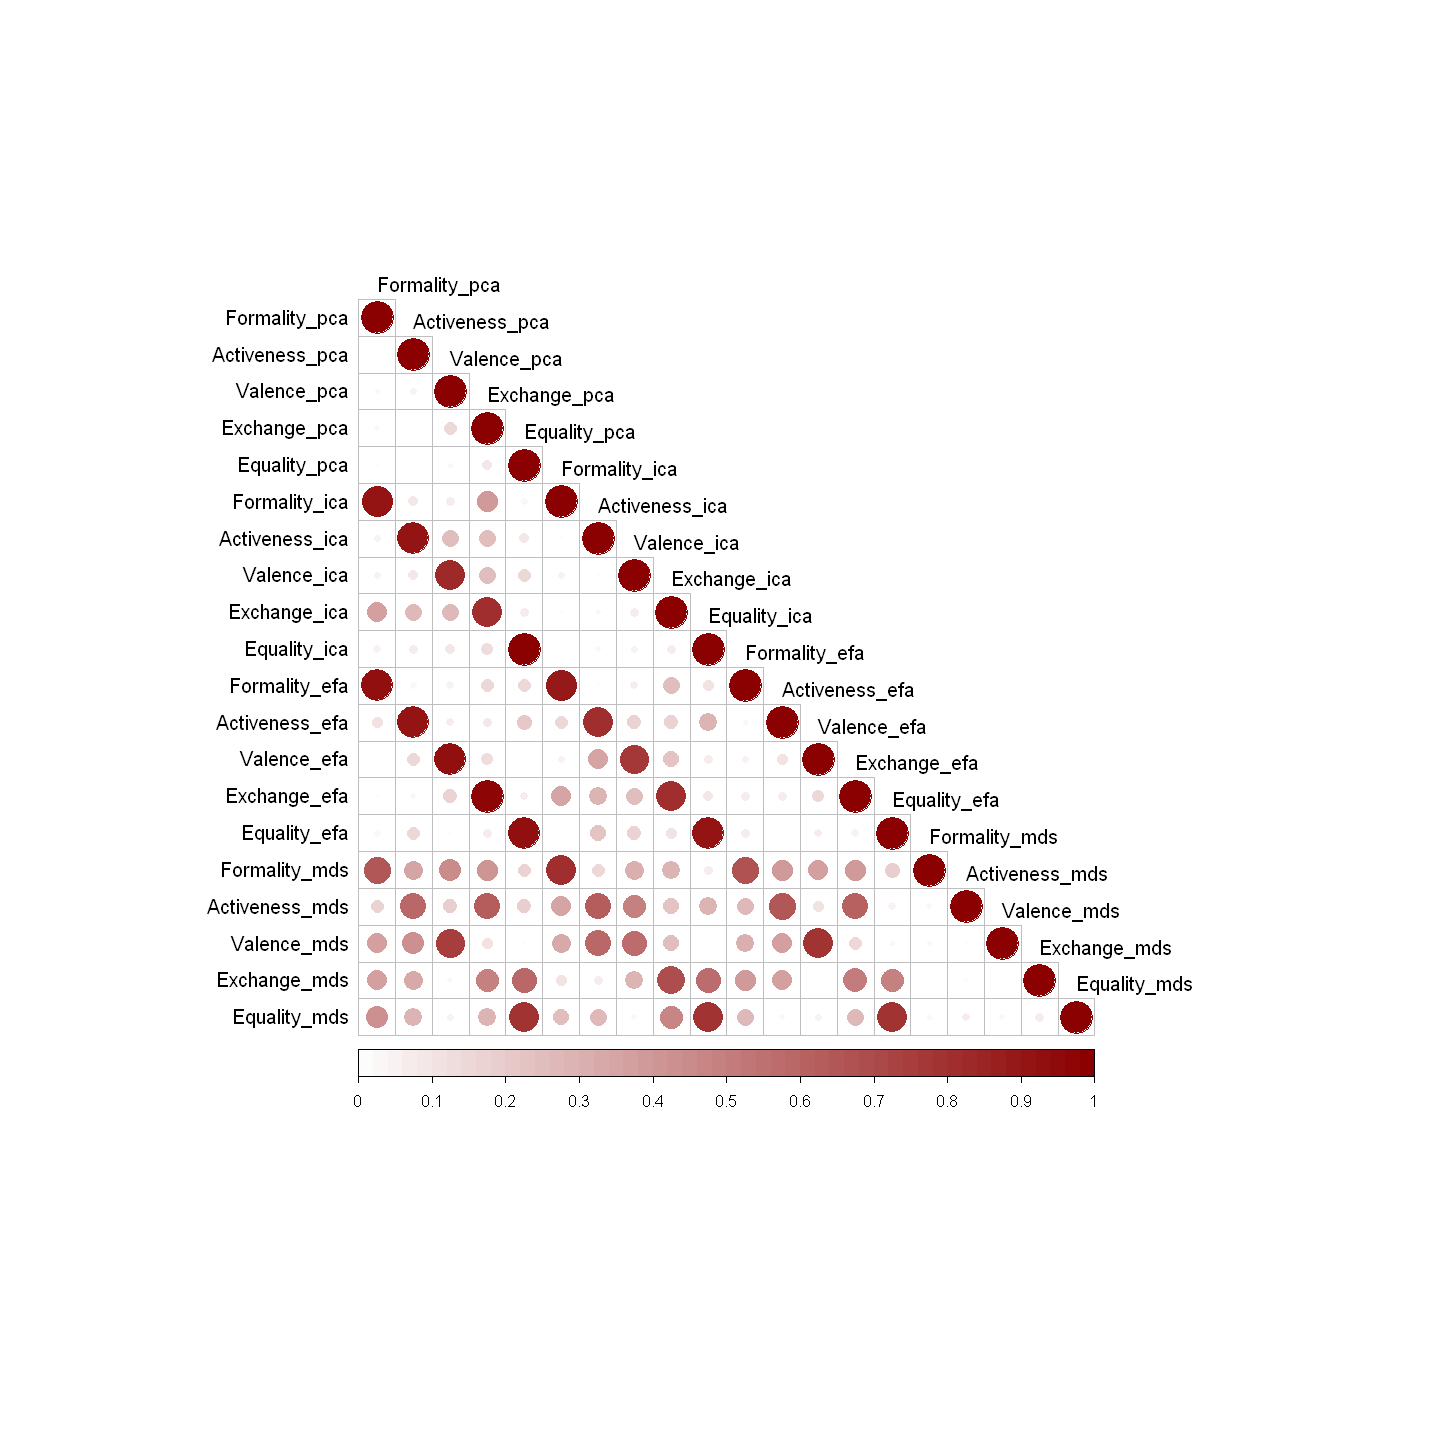

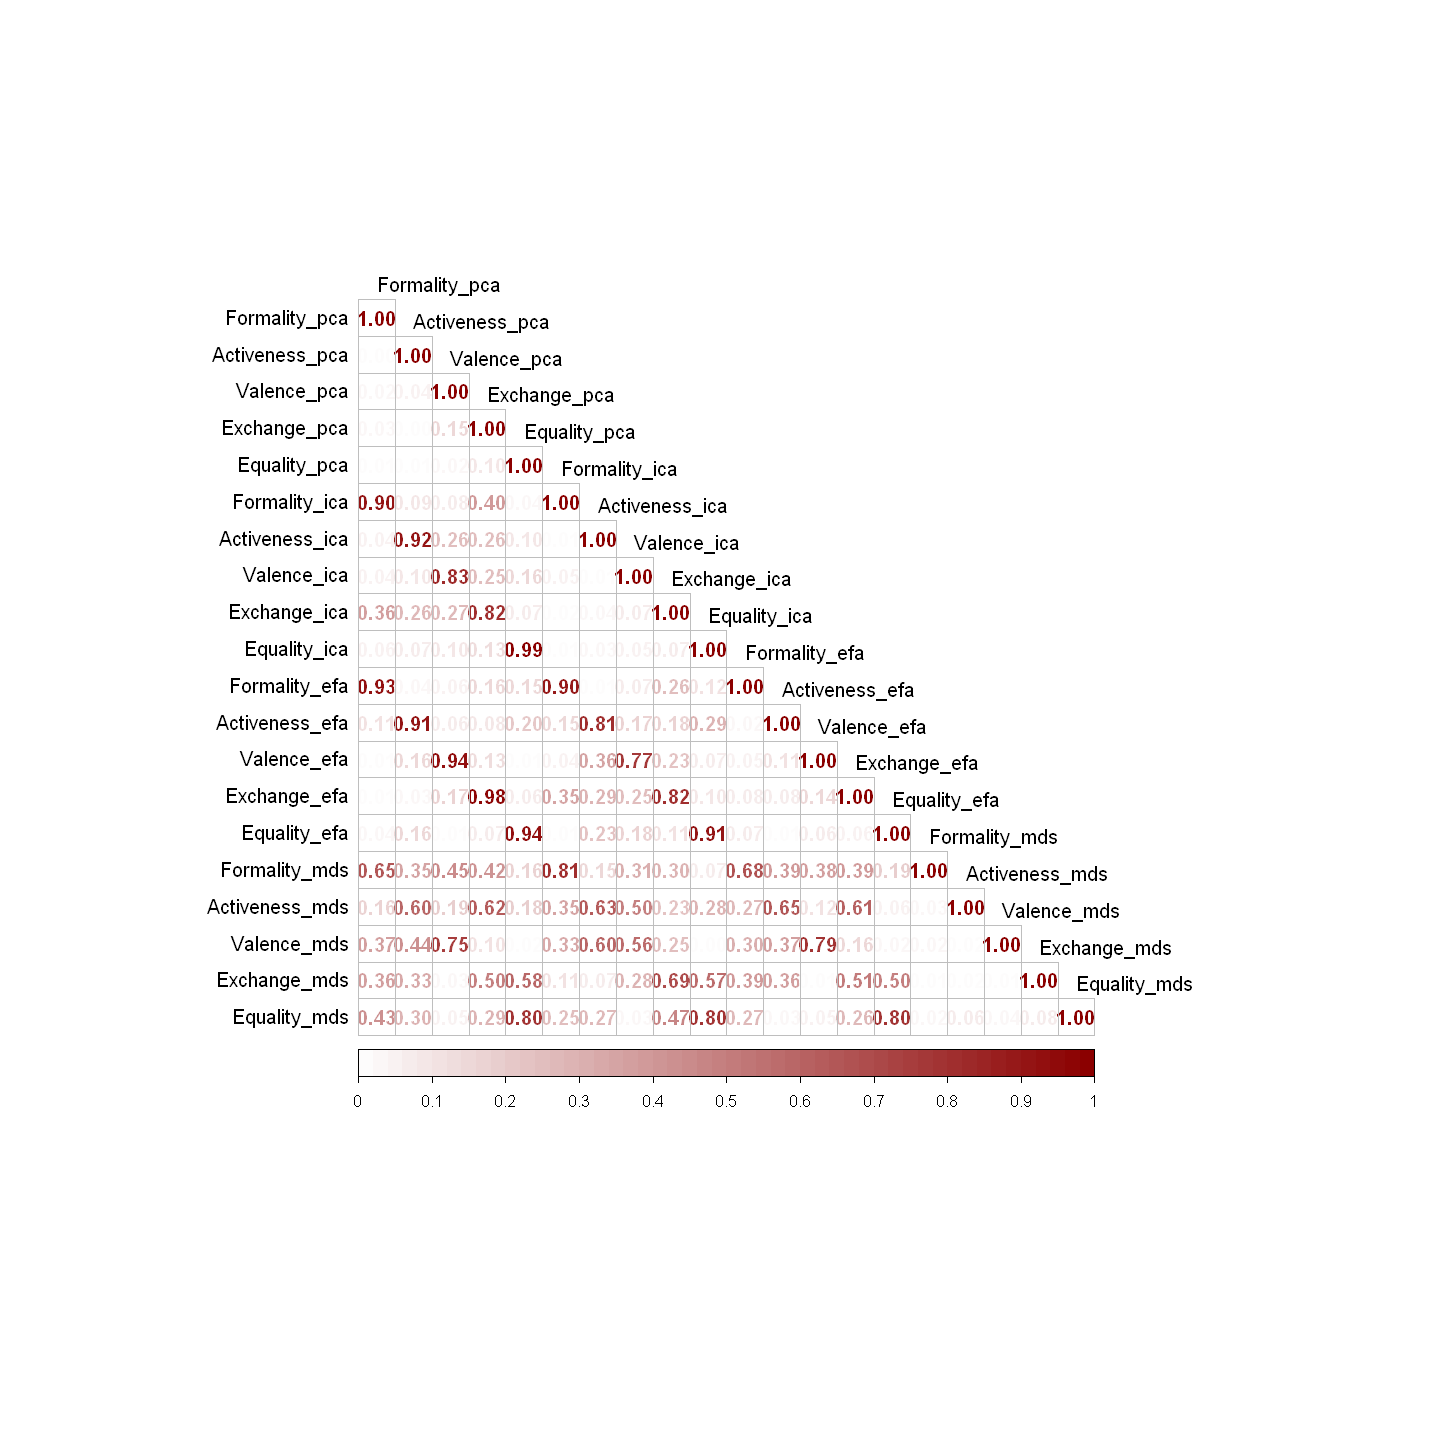

In [38]:
options(repr.plot.width = 12,repr.plot.height = 12)
score_combine = cbind(pca_scores,ica_scores,efa_scores,mds_scores)
corr_scores = cor(score_combine,method='spearman')
corrplot(abs(as.matrix(corr_scores)),
         type = 'lower',diag = TRUE,bg='transparent',
         col.lim = c(0,1),col= colorRampPalette(c("midnightblue","white","darkred"))(100),
         tl.col="black",tl.srt = 0.001, mar = c(2,2,2,2),
         family = 'sans')

corrplot(abs(as.matrix(corr_scores)),
         type = 'lower',diag = TRUE,bg='transparent',method = 'number',
         col.lim = c(0,1),col= colorRampPalette(c("midnightblue","white","darkred"))(100),
         tl.col="black",tl.srt = 0.001, mar = c(2,2,2,2),
         family = 'sans')

In [39]:
png("output_graph/corr_scores.png", bg="transparent",
    family = 'sans',units='in',width=18,height=18,res=300)

score_combine = cbind(pca_scores,ica_scores,efa_scores,mds_scores)
corr_scores = cor(score_combine,method='spearman')
rownames(corr_scores) = rep('',20)
colnames(corr_scores) = rep('',20)
corrplot(abs(as.matrix(corr_scores)),type = 'lower',diag = TRUE,bg='transparent',
         col.lim = c(0,1),col= colorRampPalette(c("midnightblue","white","darkred"))(100),
         tl.col="black",tl.srt = 0.001, tl.cex = 2.5, cl.cex = 2.5,
         mar = c(2,2,2,2),
         family = 'sans')
dev.off()

png 
  2